#Random Forest:- Problem Statement:
Que 1 - A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

Dataset:- Company Data

In [1]:
#import library:-

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
#import Data:-

In [5]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
#data understanding:-

In [7]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
company_data.shape

(400, 11)

In [9]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [11]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [12]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [13]:
company_data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [14]:
company_data.ShelveLoc.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [132]:
#data visualization:-

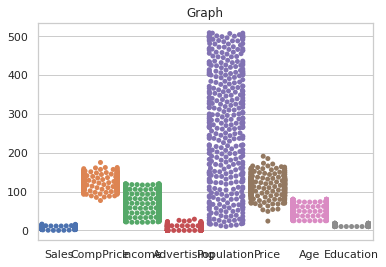

In [119]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.swarmplot(data=company_data)
 
plt.title('Graph')
 
plt.show()

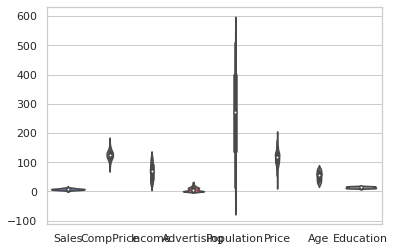

In [121]:
 sns.violinplot(data=company_data)

In [ ]:
# Correlation Matrix :-

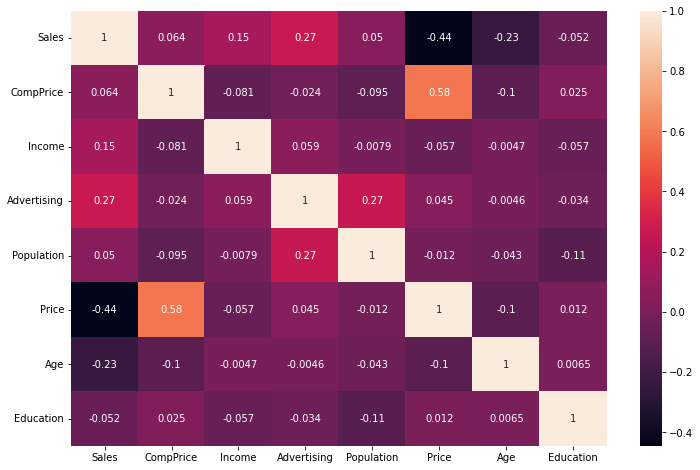

In [15]:
plt.figure(figsize = (12,8))
sns.heatmap(company_data.corr(),annot = True)
plt.show()

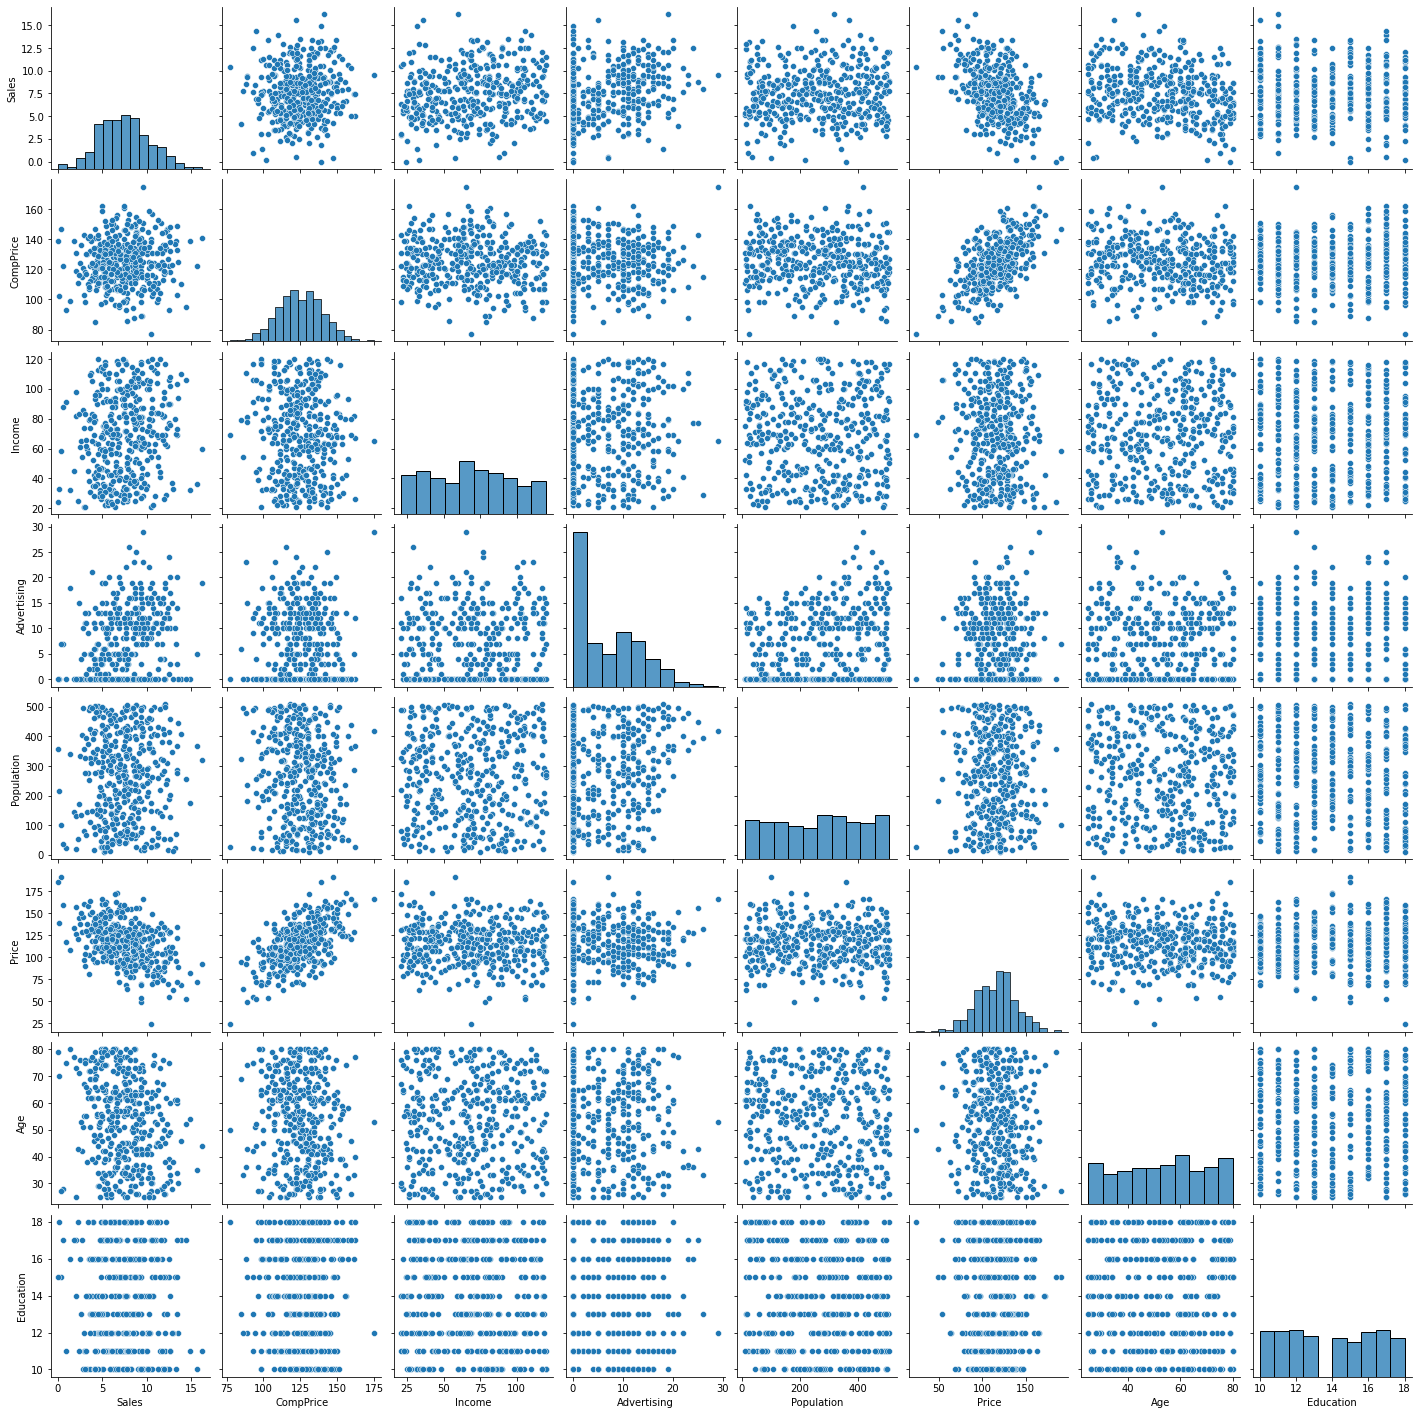

In [118]:
sns.pairplot(company_data)
plt.show()

In [122]:
categorical_feature = company_data.describe(include=["object"]).columns

print(list(categorical_feature))

['ShelveLoc', 'Urban', 'US']


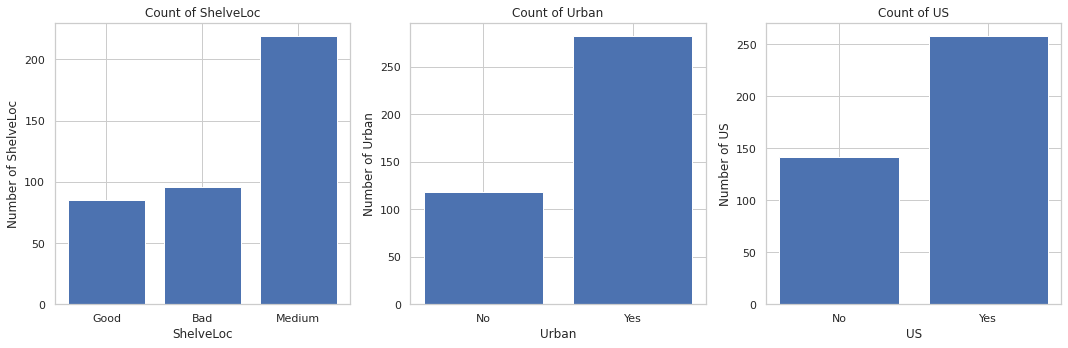

In [123]:
plt.figure(figsize=(15, 5))
for idx, column in enumerate(categorical_feature):
    df = company_data.copy()
    unique = df[column].value_counts(ascending=True);
 
    plt.subplot(1, 3, idx+1)    
    plt.title("Count of "+ column)
    plt.bar(unique.index, unique.values);
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)
    
plt.tight_layout()
plt.show() 

In [126]:
def distplot(param):
    plt.figure(figsize=(18,13))
    sns.distplot(company_data[param], color = "magenta", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.show()

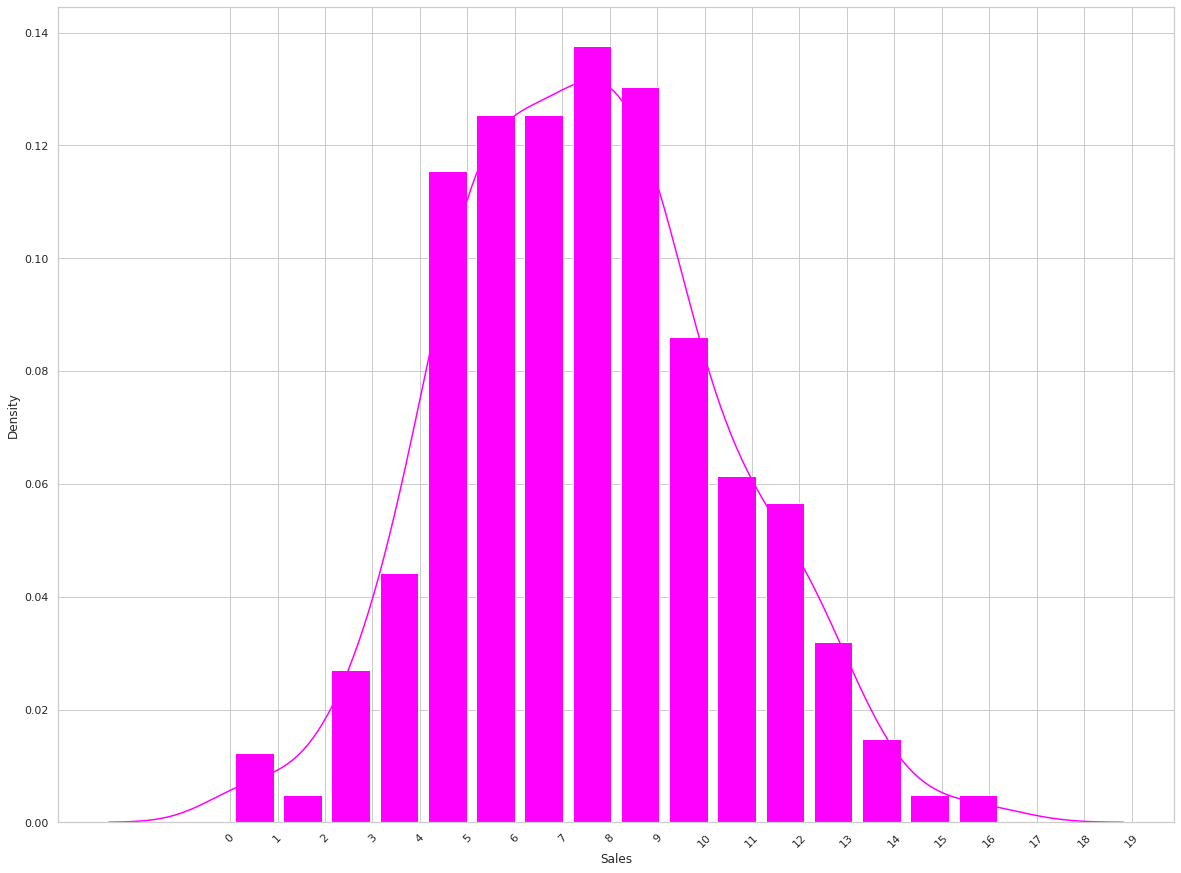

In [125]:
distplot("Sales")

Text(0.5, 1.0, 'Correlation with Sales')

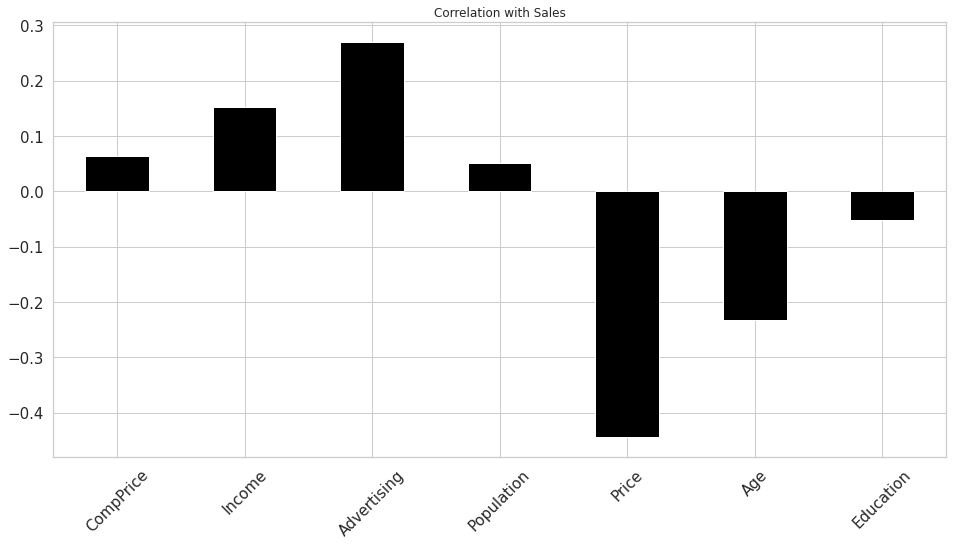

In [131]:
company_data_1 = company_data.iloc[:,1:]

correlations = company_data_1.corrwith(company_data.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (16, 8), 
        fontsize = 15, 
        color = 'black',
        rot = 45, grid = True)
plt.title('Correlation with Sales')

In [133]:
# Category Encoder :-

In [134]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
from category_encoders import OrdinalEncoder
from sklearn import preprocessing

In [136]:
encoder = OrdinalEncoder(cols = ["ShelveLoc", "Urban", "US"])
sales = encoder.fit_transform(company_data)

In [137]:
sale_val = []

for value in company_data['Sales']:
    
    if value <= 7.49:
        sale_val.append("low")
    else:
        sale_val.append("high")
        sales['sale_val'] = pd.Series(sale_val)

In [138]:
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1,high
396,6.14,139,23,3,37,120,3,55,11,2,1,low
397,7.41,162,26,12,368,159,3,40,18,1,1,low
398,5.94,100,79,7,284,95,1,50,12,1,1,low


In [139]:
#Splitting in x and y :-

In [140]:
x = sales.drop(['sale_val', 'Sales'],axis = 1)
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [141]:
y = sales['sale_val']
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sale_val, Length: 400, dtype: object

In [142]:
# Bagged Decision Trees for Classification:-

In [143]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [144]:
cart_1 = DecisionTreeClassifier()

In [145]:
num_trees_1 = 100

In [146]:
k_fold_1 = KFold(n_splits = 10,shuffle = True, random_state = 8)
model_1 = BaggingClassifier(base_estimator = cart_1, n_estimators = num_trees_1, random_state = 8)

In [147]:
results = cross_val_score(model_1, x,y, cv = k_fold_1)
print(results.mean()) 

0.82


In [149]:
#Random Forest Classification:-

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
cart_2 = RandomForestClassifier()

In [152]:
num_trees_2 = 100
max_features = 3

In [153]:
k_fold_2 = KFold(n_splits = 10, shuffle = True ,random_state = 8)
model_2 = RandomForestClassifier(n_estimators = num_trees_2, max_features = max_features)

In [154]:
results = cross_val_score(model_2, x, y, cv = k_fold_2)
print(results.mean())

0.8099999999999999


In [155]:
# Boost Classification:-

In [156]:
from sklearn.ensemble import AdaBoostClassifier

In [157]:
cart_3 = AdaBoostClassifier()

In [158]:
seed = 8
num_trees_3 = 100

In [159]:
k_fold_3 = KFold(n_splits = 100, shuffle = True, random_state = seed)
model_3 = AdaBoostClassifier(n_estimators = num_trees_3, random_state = seed)

In [160]:
results = cross_val_score(model_3, x,y, cv = k_fold_3)
print(results.mean())

0.8275


In [161]:
#Stacking Ensemble for Classification:-

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [163]:
k_fold_4 = KFold(n_splits = 10,shuffle = True, random_state = 8)
estimators = []

In [164]:
#Create the sub models:-

In [165]:
model_4 = LogisticRegression(max_iter = 100)                          
estimators.append(('logistic', model_4))

In [166]:
model_5 = DecisionTreeClassifier()
estimators.append(('cart', model_5))

In [167]:
model_6 = SVC()
estimators.append(('svm', model_6))

In [168]:
#Create the ensemble model:-

In [169]:
ensemble = VotingClassifier(estimators)                            
results = cross_val_score(ensemble, x, y, cv = k_fold_4)
print(results.mean())

0.795


In [170]:
#Result :
#a) Model Accuracy for Decision Tree Classifier : 0.82
#b) Model Accuracy for Random Forest Classifier : 0.8099
#c) Model Accuracy for Ada Boost Classifier     : 0.8275
#d) Model Accuracy for Stacking Ensemble        : 0.795

#Que 2 - Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Dataset:- fraud_check

In [171]:
#import library:-

In [172]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [173]:
# import data:-

In [174]:
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [57]:
#Data Understanding:-

In [58]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [59]:
fraud_data.shape

(600, 6)

In [63]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [65]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [62]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [66]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [67]:
fraud_data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [68]:
fraud_data['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [185]:
#visualization

In [69]:
#Correlation Matrix ::-

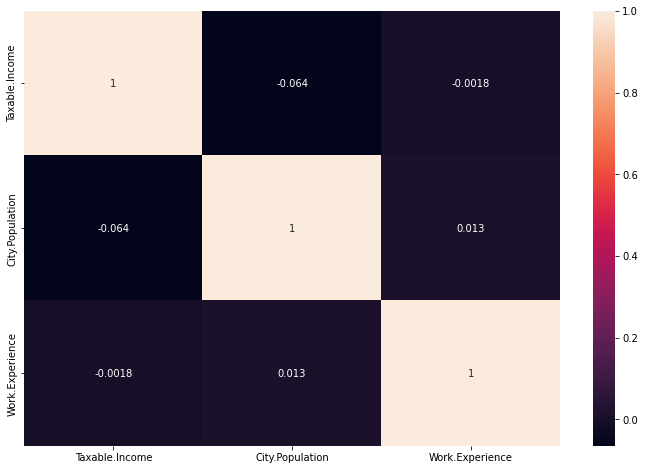

In [70]:
plt.figure(figsize = (12,8))
sns.heatmap(fraud_data.corr(),annot = True)
plt.show()

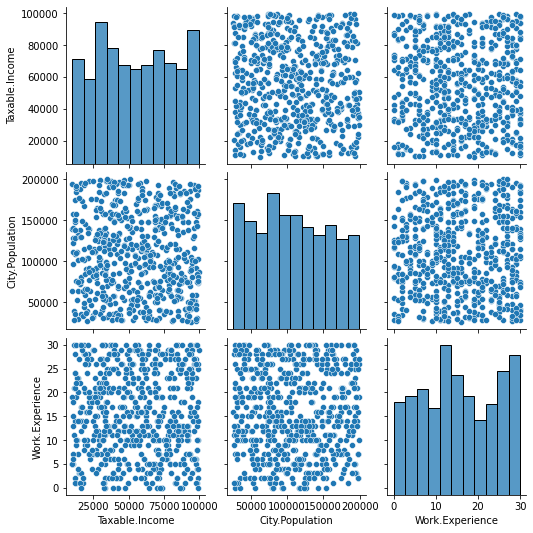

In [71]:
sns.pairplot(fraud_data)
plt.show()

In [179]:
def distplot(param):
    plt.figure(figsize=(14,7))
    sns.distplot(fraud_data[param], color = "magenta", hist_kws={"rwidth":0.80, 'alpha':1.0})
    plt.xticks(np.arange(0,20,1),rotation=45)
    plt.show()

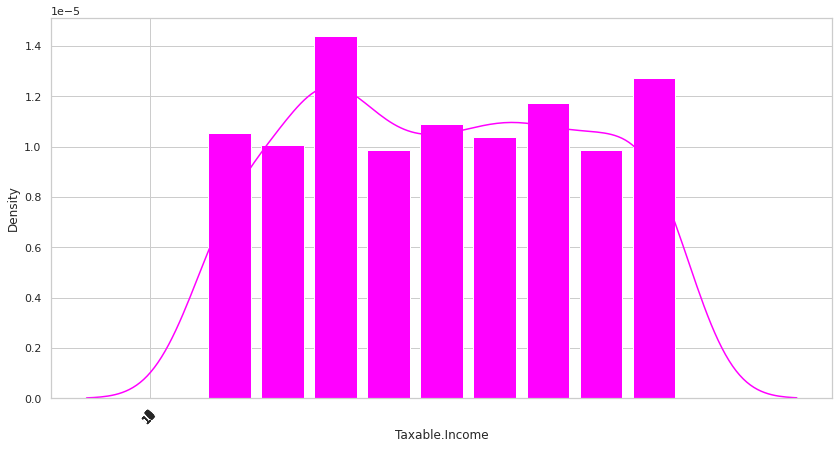

In [184]:
distplot("Taxable.Income")

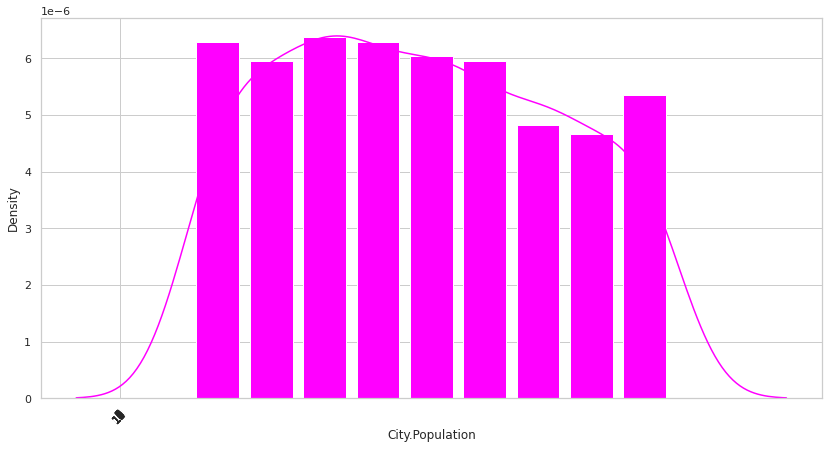

In [181]:
distplot("City.Population")

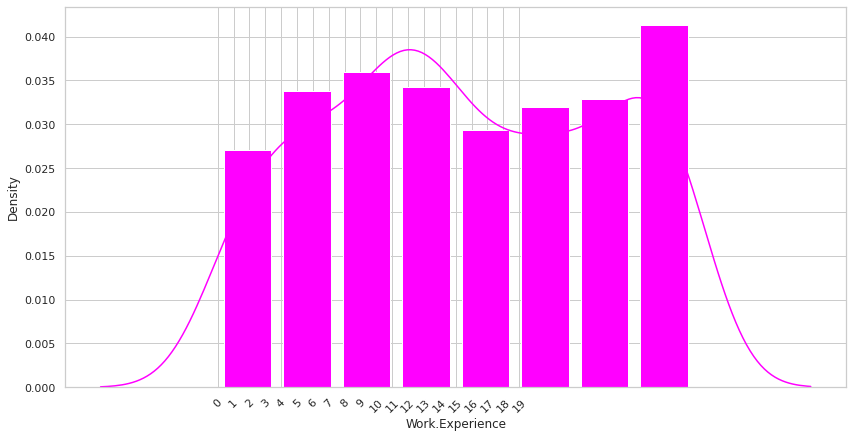

In [183]:
distplot("Work.Experience")

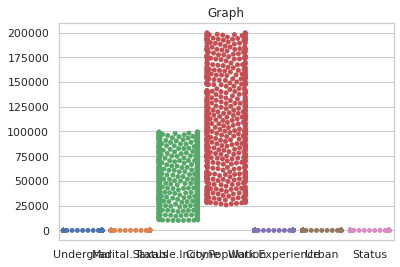

In [228]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.swarmplot(data= fraud_data)
 
plt.title('Graph')
 
plt.show()

In [186]:
# Label Encoder :-

In [187]:
from sklearn import preprocessing

In [188]:
label_encoder = preprocessing.LabelEncoder()
label_encoder

LabelEncoder()

In [189]:
fraud_data['Undergrad'] = label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital.Status'] = label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban'] = label_encoder.fit_transform(fraud_data['Urban'])

In [190]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [191]:
# Adding New Column :-

In [192]:
fraud_data['Status'] = fraud_data['Taxable.Income'].apply(lambda Income: 'Risky' if Income <= 30000 else 'Good')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [225]:
fraud_data['Status'].unique()

array([0, 1])

In [194]:
fraud_data['Status'] = label_encoder.fit_transform(fraud_data['Status'])
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [195]:
#Splitting in x and y :

In [196]:
x = fraud_data.iloc[:,0:4]
x

,Undergrad,Marital.Status,Taxable.Income,City.Population
0,0,2,68833,50047
1,1,0,33700,134075
2,0,1,36925,160205
3,1,2,50190,193264
4,0,1,81002,27533
...,...,...,...,...
595,1,0,76340,39492
596,1,0,69967,55369
597,0,0,47334,154058
598,1,1,98592,180083


In [197]:
y = fraud_data['Status']
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Status, Length: 600, dtype: int64

In [198]:
#Bagged Decision Trees for Classification:-

In [199]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [200]:
cart_1 = DecisionTreeClassifier()

In [201]:
num_trees_1 = 100

In [202]:
k_fold_1 = KFold(n_splits = 10,shuffle = True, random_state = 8)
model_1 = BaggingClassifier(base_estimator = cart_1, n_estimators = num_trees_1, random_state = 8)

In [203]:
results = cross_val_score(model_1, x,y, cv = k_fold_1)
print(results.mean()) 

0.9983333333333334


# Random Forest Classification:-

In [204]:
from sklearn.ensemble import RandomForestClassifier

In [205]:
cart_2 = RandomForestClassifier()

In [206]:
num_trees_2 = 100
max_features = 3

In [207]:
k_fold_2 = KFold(n_splits = 10, shuffle = True ,random_state = 8)
model_2 = RandomForestClassifier(n_estimators = num_trees_2, max_features = max_features)

In [208]:
results = cross_val_score(model_2, x, y, cv = k_fold_2)
print(results.mean()) 

0.9983333333333334


In [209]:
# Boost Classification:-

In [210]:
from sklearn.ensemble import AdaBoostClassifier

In [211]:
cart_3 = AdaBoostClassifier()

In [212]:
seed = 8
num_trees_3 = 100

In [103]:
k_fold_3 = KFold(n_splits = 100, shuffle = True, random_state = seed)
model_3 = AdaBoostClassifier(n_estimators = num_trees_3, random_state = seed)

In [213]:
results = cross_val_score(model_3, x,y, cv = k_fold_3)
print(results.mean())

0.9983333333333334


In [214]:
#Stacking Ensemble for Classification;-

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [216]:
k_fold_4 = KFold(n_splits = 10,shuffle = True, random_state = 8)
estimators = []

In [217]:
#Create the sub models:-

In [218]:
model_4 = LogisticRegression(max_iter = 100)                          
estimators.append(('logistic', model_4))

In [219]:
model_5 = DecisionTreeClassifier()
estimators.append(('cart', model_5))

In [220]:
model_6 = SVC()
estimators.append(('svm', model_6))

In [221]:
#Create the ensemble model:-

In [222]:
ensemble = VotingClassifier(estimators)                            
results = cross_val_score(ensemble, x, y, cv = k_fold_4)
print(results.mean())

0.9833333333333332


In [223]:
#Result :
#For Decision Tree Classifier, Random Forest Classifier & Ada Boost Classifier Models the Accuracy is : 0.9983

#For Stacking Ensemble Model the Accuracy is : 0.9833